**Model Building-Deep Learning

LSTM, DNN (Deep Neural Networks)

In [1]:
%pip install tensorflow --upgrade keras-tuner statsmodels pandas numpy scikit-learn

  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# Load data
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['Social_Anxiety_Category'])
y_train = train_data['Social_Anxiety_Category']
X_val = val_data.drop(columns=['Social_Anxiety_Category'])
y_val = val_data['Social_Anxiety_Category']
X_test = test_data.drop(columns=['Social_Anxiety_Category'])
y_test = test_data['Social_Anxiety_Category']

# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# One-hot encoding the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape the data for deep learning models (e.g., CNN, LSTM)
# For DNN, reshape it to be 2D: (samples, features)
X_train_dnn = X_train
X_val_dnn = X_val
X_test_dnn = X_test

# Reshape the data for 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, features, channels)
X_val_cnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Reshape the data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [3]:
# ---------------------- Model Performance Evaluation ----------------------

def evaluate_deep_learning_model(model, model_name, x_train, y_train, x_test, y_test, history=None):
    # Model summary
    print(f"\n{'='*40}\n{' '*10}{model_name} Model Summary\n{'='*40}")
    model.summary()

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f"\n{'='*40}\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

    # ------------------- Classification Report -------------------
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
    y_true = np.argmax(y_test, axis=1)

    classificationreport = classification_report(y_true, y_pred_classes, output_dict=True)
    report_df = pd.DataFrame(classificationreport).transpose()

    print("\nClassification Report:")
    display(report_df.round(2))

    # ------------------- Confusion Matrix -------------------
    confusionmatrix = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
    plt.title(f'{model_name} - Confusion Matrix', fontsize=16, pad=20)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # ------------------- Accuracy and Loss Plot -------------------
    if history:
        plt.figure(figsize=(12, 6))

        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
        plt.title(f'{model_name} - Accuracy', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
        plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
        plt.title(f'{model_name} - Loss', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

    return test_accuracy, test_loss, classificationreport, confusionmatrix


1.Deep Neural Network (DNN)

c:\Users\lxy03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 69s 20ms/step - accuracy: 0.8701 - loss: 0.2726 - val_accuracy: 0.9164 - val_loss: 0.1604
Epoch 2/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9169 - loss: 0.1579 - val_accuracy: 0.9183 - val_loss: 0.1513
Epoch 3/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9219 - loss: 0.1469 - val_accuracy: 0.9263 - val_loss: 0.1339
Epoch 4/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 111s 35ms/step - accuracy: 0.9218 - loss: 0.1448 - val_accuracy: 0.9242 - val_loss: 0.1372
Epoch 5/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.9199 - loss: 0.1447 - val_accuracy: 0.9264 - val_loss: 0.1341
Epoch 6/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 54s 17ms/step - accuracy: 0.9227 - loss: 0.1408 - val_accuracy: 0.9261 - val_loss: 0.1316
Epoch 7/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 56s 18ms/step - accuracy: 0.9240 - loss: 0.1383 - val_accuracy: 0.9262 - val_loss: 0.1306
Epoch 8/20
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - accuracy: 0.9240 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,016,779 (7.69 MB)

 Trainable params: 672,259 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,344,520 (5.13 MB)

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9296 - loss: 0.1279

Test Loss: 0.1301
Test Accuracy: 0.9271

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step

Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,20338.00
1,0.81,0.99,0.89,20759.00
2,0.99,0.83,0.90,27087.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.94,0.93,68184.00
weighted avg,0.94,0.93,0.93,68184.00


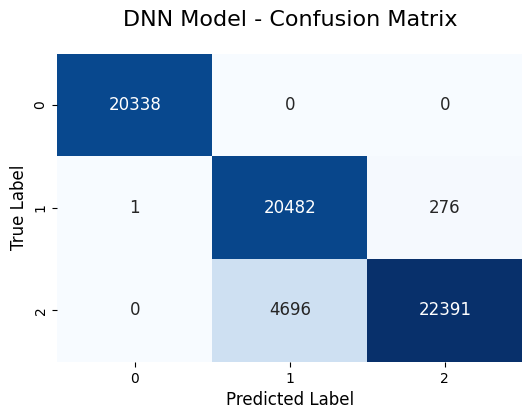

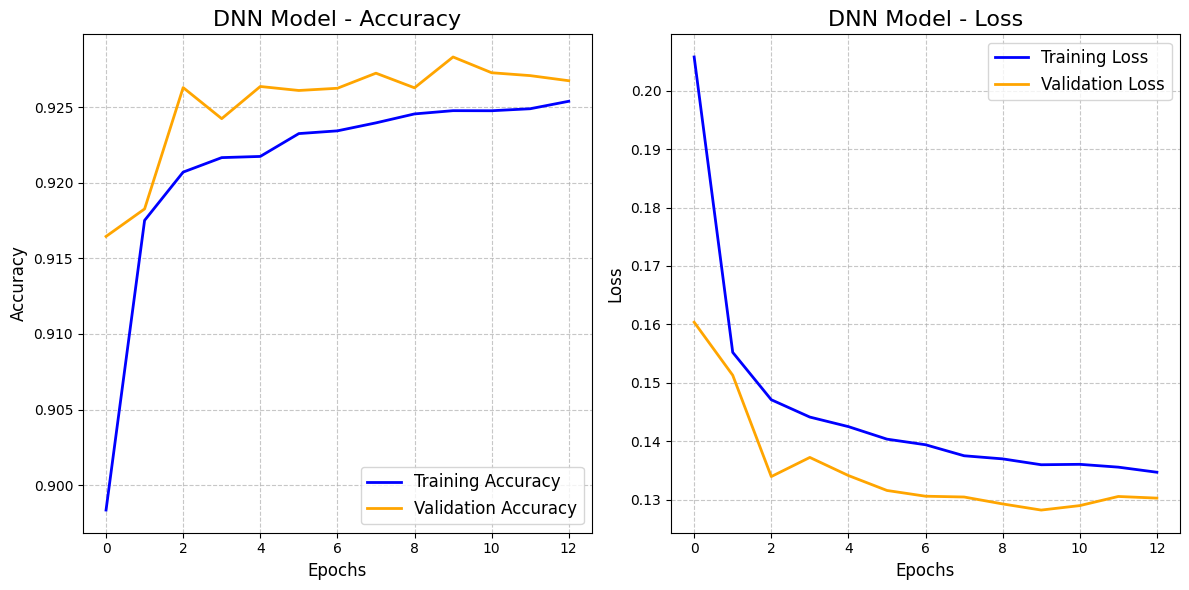

In [4]:
def build_dnn():
    model = keras.Sequential([
        layers.Flatten(input_shape=X_train_dnn.shape[1:]),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# DNN Model
dnn_model = build_dnn()
history_dnn = dnn_model.fit(X_train_dnn, y_train, batch_size=64, epochs=20, 
                            validation_data=(X_val_dnn, y_val), shuffle=True, 
                            callbacks=[early_stopping])

dnn_accuracy, dnn_loss, dnn_classificationreport, dnn_confusionmatrix = evaluate_deep_learning_model(
    dnn_model, "DNN Model", X_train_dnn, y_train, X_test_dnn, y_test, history_dnn)



In [ ]:
import shutil
import os

# Remove previous tuning directory to avoid reload issues
if os.path.exists('dnn_tuning/dnn_tuning_project'):
    shutil.rmtree('dnn_tuning/dnn_tuning_project')

from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import pandas as pd

# Define the function to build the DNN model with SGD optimizer
def build_tuned_dnn_model(hp):
    model = Sequential()
    model.add(layers.Flatten(input_shape=X_train_dnn.shape[1:]))

    # Tunable Dense layers
    num_layers = hp.Int('num_layers', 1, 3)
    for i in range(num_layers):
        model.add(layers.Dense(
            hp.Int(f'units_{i}', min_value=128, max_value=1024, step=128),
            activation='relu'
        ))
        model.add(layers.Dropout(
            hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)
        ))

    model.add(layers.Dense(num_classes, activation='softmax'))

    optimizer = SGD(
        learning_rate=hp.Float('learning_rate', min_value=0.001, max_value=0.01, sampling='log'),
        momentum=hp.Float('momentum', min_value=0.7, max_value=0.9, step=0.1)
    )

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Keras Tuner Hyperband setup
tuner_dnn = kt.Hyperband(
    build_tuned_dnn_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='dnn_tuning',
    project_name='dnn_tuning_project'
)

# Start hyperparameter search
tuner_dnn.search(X_train_dnn, y_train, epochs=10, validation_data=(X_val_dnn, y_val), callbacks=[early_stopping])

# Get the best model
best_dnn_model = tuner_dnn.get_best_models(num_models=1)[0]

# Train the best model
history_dnn_tuned = best_dnn_model.fit(
    X_train_dnn, y_train, batch_size=64, epochs=20,
    validation_data=(X_val_dnn, y_val), shuffle=True,
    callbacks=[early_stopping]
)

# Display the best 2 hyperparameters
best_trial = tuner_dnn.oracle.get_best_trials(num_trials=1)[0]
best_hyperparameters = best_trial.hyperparameters.values
best_hyperparameters_dict = {key: best_hyperparameters[key] for key in list(best_hyperparameters.keys())[:2]}

hyperparameters_df = pd.DataFrame(list(best_hyperparameters_dict.items()), columns=['Hyperparameter', 'Value'])
print("Best Hyperparameters:")
print(hyperparameters_df)

# Evaluate the model (ensure 'evaluate_deep_learning_model' exists)
dnntuned_accuracy, dnntuned_loss, dnntuned_classificationreport, dnntuned_confusionmatrix = evaluate_deep_learning_model(
    best_dnn_model, "Tuned DNN Model", X_train_dnn, y_train, X_test_dnn, y_test, history_dnn_tuned
)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_layers
640               |640               |units_0
0.3               |0.3               |dropout_0
0.0039856         |0.0039856         |learning_rate
0.9               |0.9               |momentum
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
6380/6393 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8134 - loss: 0.4295

In [ ]:
import joblib
joblib.dump(best_dnn_model, 'best_dnn_model.pkl')

print("Model exported successfully as 'best_dnn_model.pkl'.")

2.Convolutional Neural Network (CNN)

In [ ]:
# Build the CNN Model
def build_cnn_model():
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape=(X_train_cnn.shape[1], 1),
                     kernel_initializer='he_normal', kernel_regularizer='l2'))  # Kernel size reduced to 2
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 2, activation='relu'))  # Kernel size reduced to 2
    model.add(MaxPooling1D(2))
    model.add(Conv1D(128, 2, activation='relu'))  # Kernel size reduced to 2
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Changed the output layer to have 3 units (as there are 3 classes)

    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Initialize the model
cnn_model = build_cnn_model()

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, batch_size=64, epochs=20,
                            validation_data=(X_val_cnn, y_val), shuffle=True,
                            callbacks=[early_stopping])

# Evaluate the model
cnn_accuracy,cnn_loss,cnn_classificationreport, cnn_confusionmatrix = evaluate_deep_learning_model(
    cnn_model, "CNN Model", X_train_cnn, y_train, X_test_cnn, y_test, history_cnn)

In [ ]:
import shutil
import os

# Remove previous CNN tuning directory to avoid reload issues
if os.path.exists('cnn_tuning/cnn_tuning_project'):
    shutil.rmtree('cnn_tuning/cnn_tuning_project')

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import pandas as pd

# Define the function to build the CNN model with tunable hyperparameters
def build_cnn_model(hp):
    model = Sequential()
    max_kernel_size = min(4, X_train_cnn.shape[1])

    model.add(Conv1D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32), 
        kernel_size=hp.Int('kernel_size_1', min_value=2, max_value=max_kernel_size, step=1),
        activation='relu', 
        input_shape=(X_train_cnn.shape[1], 1),
        kernel_initializer='he_normal', 
        kernel_regularizer='l2',
        padding='same'
    ))
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(
        filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
        kernel_size=hp.Int('kernel_size_2', min_value=2, max_value=max_kernel_size, step=1),
        activation='relu',
        padding='same'
    ))
    model.add(MaxPooling1D(2))

    model.add(Conv1D(
        filters=hp.Int('filters_3', min_value=128, max_value=512, step=128),
        kernel_size=hp.Int('kernel_size_3', min_value=2, max_value=max_kernel_size, step=1),
        activation='relu',
        padding='same'
    ))
    model.add(MaxPooling1D(2))

    model.add(Flatten())
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)))
    
    model.add(Dense(units=hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))
    
    model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        metrics=['accuracy']
    )
    
    return model

# EarlyStopping callback for CNN
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Initialize Keras Tuner's Hyperband for CNN
tuner_cnn = kt.Hyperband(
    build_cnn_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='cnn_tuning',
    project_name='cnn_tuning_project'
)

# Perform hyperparameter search
tuner_cnn.search(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val), callbacks=[early_stopping])

# Get the best model from the tuner
best_cnn_model = tuner_cnn.get_best_models(num_models=1)[0]

# Train the best model
history_cnn_tuned = best_cnn_model.fit(
    X_train_cnn, y_train, batch_size=64, epochs=20, 
    validation_data=(X_val_cnn, y_val), shuffle=True, 
    callbacks=[early_stopping]
)

# Extract and display the best 3 hyperparameters for CNN
best_trial = tuner_cnn.oracle.get_best_trials(num_trials=1)[0]
best_hyperparameters = best_trial.hyperparameters.values
best_hyperparameters_dict = {key: best_hyperparameters[key] for key in list(best_hyperparameters.keys())[:3]}

# Create and print the DataFrame
hyperparameters_df = pd.DataFrame(list(best_hyperparameters_dict.items()), columns=['Hyperparameter', 'Value'])
print("Best Hyperparameters:")
print(hyperparameters_df)

# Evaluate the tuned model (ensure 'evaluate_deep_learning_model' function exists)
cnntuned_accuracy, cnntuned_loss, cnntuned_classificationreport, cnntuned_confusionmatrix = evaluate_deep_learning_model(
    best_cnn_model, "Tuned CNN Model", X_train_cnn, y_train, X_test_cnn, y_test, history_cnn_tuned
)

Compare